## Decision Tree Regressor

### Business Scenario : Build an efficient mode that predicts Power Energy of a powerplant with changes in Atmospheric temp,pressure,Vaccume and humidity taken into consideration.

### Step 1: Data gathering

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
path = r"https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/PowerPlant.csv"
df = pd.read_csv(path)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


Dataset: Powerplant

    AT-Atmospheric Temperature
    V-Vaccum
    AP-Atmospheric Pressue
    RH-Relative Humidity
    PE - Power Energy generated

### Step2: Perform basic quality checks

In [4]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [6]:
df.shape

(9568, 5)

In [7]:
# Missing data
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(41)

In [9]:
# Drop the duplicates
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

np.int64(0)

### Seperate X and Y feature

Y : Target lable : PE

In [11]:
X = df.drop(columns = 'PE')
Y = df[['PE']]

In [12]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [13]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


### Step 3 : Data preprocessing and data cleaning

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
pre = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
).set_output(transform='pandas')

In [16]:
pre

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [17]:
X_pre = pre.fit_transform(X)
X_pre

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837
...,...,...,...,...
9563,-0.609648,-0.423583,-0.241925,-0.027724
9564,1.847362,1.864831,-0.494441,-0.932100
9565,-0.492776,-0.863450,0.162101,0.364561
9566,-0.269777,0.439598,0.899448,1.459261


### Step4: Split the data into training and testing

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.8,random_state=21)

In [20]:
xtrain.head()

,AT,V,AP,RH
4531,-1.685682,-1.066041,1.542523,1.205953
6736,0.305182,0.516062,0.768140,0.634984
8019,-1.572839,-1.027415,-0.800827,1.683130
5136,-0.296645,-0.267501,-0.181321,0.716453
857,-1.289390,-1.157483,1.284956,0.046215


In [21]:
xtest.head()

,AT,V,AP,RH
4903,0.340109,0.683180,1.061059,-0.367977
2944,0.023076,0.405701,-0.043279,1.225807
1771,-0.354409,-0.744418,0.192403,-0.730823
1450,-0.586811,-1.020320,-1.164450,0.631561
5399,-0.310078,-1.148812,-1.723353,-0.596639


In [22]:
ytrain.head()

,PE
4531,475.55
6736,443.89
8019,480.60
5136,458.67
857,476.92


In [23]:
ytest.head()

,PE
4903,453.03
2944,446.15
1771,459.98
1450,466.27
5399,459.83


### Step5: Build the model

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
model = DecisionTreeRegressor(
    max_depth=3,
    min_samples_leaf=4,
    min_samples_split=6,
    criterion='squared_error'
)
model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=4, min_samples_split=6)

In [26]:
model.score(xtrain,ytrain)

0.9099554171003713

In [27]:
model.score(xtest,ytest)

0.9124325338517737

### Hyperparameter tuning with GridsearchCV

In [28]:
params = {
    'max_depth':[3,4,5,6,7,8,9,10,11,12],
    'min_samples_split':[1,2,3,4,5,6,7],
    'min_samples_leaf':[1,2,3,4,5,6,7,9],
    'criterion':['squared_error','absolute_error']
}

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
base_model = DecisionTreeRegressor()
gscv = GridSearchCV(estimator=base_model,param_grid=params,cv=3,scoring='r2')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 9],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7]},
             scoring='r2')

In [31]:
gscv.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'min_samples_leaf': 9,
 'min_samples_split': 2}

In [32]:
gscv.best_score_

np.float64(0.9405199050567298)

In [33]:
best_dtr = gscv.best_estimator_

In [34]:
best_dtr.score(xtrain,ytrain)

0.9631406422580158

In [35]:
best_dtr.score(xtest,ytest)

0.944705609474946

### Step 6 : Model evautation

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [37]:
ypred_test = best_dtr.predict(xtest)

In [42]:
mse = mean_squared_error(ytest,ypred_test)
mae = mean_absolute_error(ytest,ypred_test)
r2 = r2_score(ytest,ypred_test)
rmse = mse**(1/2)

print(f"MSE is: {mse}")
print(f"MAE is:{mae}")
print(f"RMSE is:{rmse}")
print(f"R2 score is:{r2*100}%")

MSE is: 16.104591167975443
MAE is:2.927326438641064
RMSE is:4.013052599702058
R2 score is:94.47056094749459%


### Step7: Plot the decision tree

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

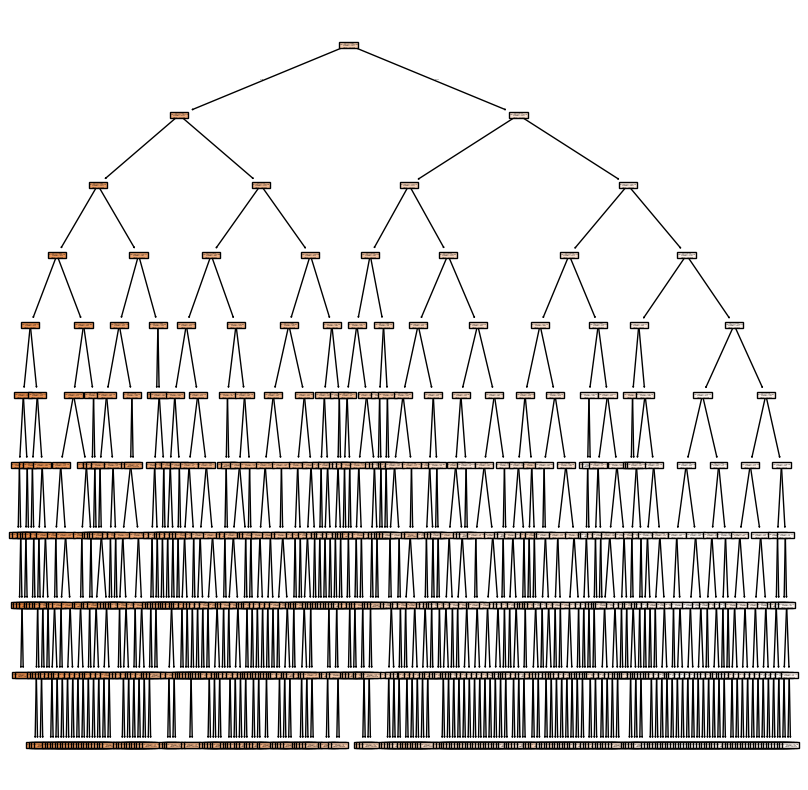

In [44]:
plt.figure(figsize=(10,10))
plot_tree(best_dtr,feature_names=xtrain.columns,filled=True)
plt.show()

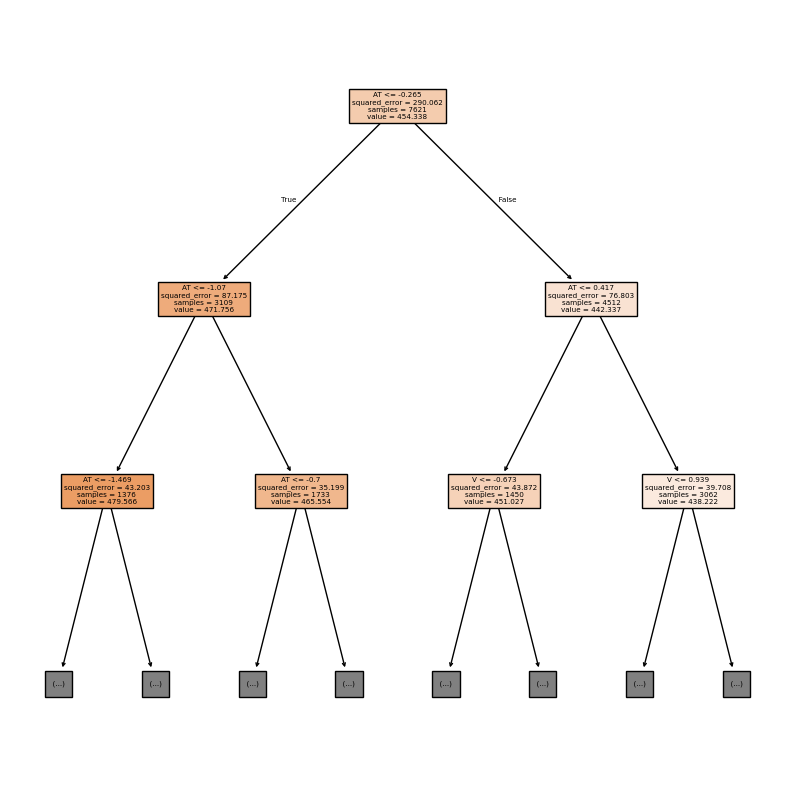

In [45]:
plt.figure(figsize=(10,10))
plot_tree(best_dtr,feature_names=xtrain.columns,max_depth=2,filled=True)
plt.show()

In [46]:
best_dtr.feature_importances_

array([0.93151538, 0.04812703, 0.01101964, 0.00933795])

In [47]:
xtrain.columns

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

In [48]:
imp_cols = pd.Series(best_dtr.feature_importances_,index=xtrain.columns)
imp_cols

AT    0.931515
V     0.048127
AP    0.011020
RH    0.009338
dtype: float64

### Step8: Out of sample predictions

In [49]:
path2 = r"https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/PowerPlantTest.csv"
xnew= pd.read_csv(path2)
xnew.head()

,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


In [50]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.717594,-0.220203,-2.211551,-1.118316
1,1.657948,-1.047911,6.373998,0.456299
2,1.120603,-0.174482,-0.511275,0.113992


In [51]:
PowerEnergy_predicted = best_dtr.predict(xnew_pre)
PowerEnergy_predicted = PowerEnergy_predicted.round(2)
PowerEnergy_predicted

array([447.65, 436.55, 436.55])

In [52]:
xnew['PE_Predicted'] = PowerEnergy_predicted

In [53]:
xnew

,AT,V,AP,RH,PE_Predicted
0,25,51.5,1000.1,57.0,447.65
1,32,41.0,1051.1,80.0,436.55
2,28,NaN,1010.2,NaN,436.55


### Step9: Save the results to csv files

In [54]:
xnew.to_csv('Powerplant results.csv',index=False)